In [47]:
import cv2
import numpy as np
import os
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
dataSet = []
person = []
horiSet = []
train_set_x = []
count = 0
folder = "/home/jeet/ML face images train"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
#         print(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200,200))
        sift = cv2.xfeatures2d.SIFT_create()
        kp, des = sift.detectAndCompute(img,None)
        kmeans = KMeans(n_clusters=1, random_state=0).fit(des)
#         print(kmeans.cluster_centers_.shape)
        train_set_x.append(kmeans.cluster_centers_)
#         person.append(numbers[0])
        img = np.ravel(img)
        if img is not None:
#             for desc in des: 
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
#             dataSet.append(desc)
            count = count + 1

print(np.array(train_set_x).shape)      
dataSet_test = []
person_test = []
horiSet_test = []
test_set_x = []
folder = "/home/jeet/ML face images test"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200, 200))
        sift = cv2.xfeatures2d.SIFT_create()
        kp, des = sift.detectAndCompute(img,None)
        #kp will be a list of keypoints and des is a numpy array of shape Number_of_Keypoints×128.
        kmeans = KMeans(n_clusters=1, random_state=0).fit(des)
        test_set_x.append(kmeans.cluster_centers_)
        img = np.ravel(img)
        if img is not None:
#             for desc in des: 
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person_test.append(numbers[0])
            horiSet_test.append(img.T)
#             dataSet_test.append(desc)
            count = count + 1
print(np.array(test_set_x).shape , np.array(person_test).shape)

(418, 1, 128)
(140, 1, 128) (140,)


In [19]:
train_set_x = np.reshape(train_set_x,(418,128))
test_set_x = np.reshape(test_set_x,(140,128))

In [20]:
import pandas as pd

#Getting data in desired format and mapping the lables
dataSet = np.array(train_set_x)
train = pd.DataFrame(dataSet)

person = np.array(person)
train['id'] = person.transpose()

unique_person = train['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))

mapped_roll = np.vectorize(roll_dict.get)(person)
train['id'] = mapped_roll.transpose()

y = train['id'].values.astype('int64')
images = train.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')

X_train = x
Y_train = y

dataSet_test = np.array(test_set_x)
test = pd.DataFrame(dataSet_test)

person_test = np.array(person_test)
test['id'] = person_test.transpose()

mapped_roll_test = np.vectorize(roll_dict.get)(person_test)
test['id'] = mapped_roll_test.transpose()
print(test['id'])

# temp = np_utils.to_categorical(test['id'])
# print(temp[2])
# print(temp.shape)


y_test = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x_test = (images.values).astype('uint8')

X_test = x_test
Y_test = y_test



0      29
1      32
2       4
3      14
4      34
5      35
6      25
7      29
8       6
9      18
10     25
11     19
12     21
13     24
14     28
15     33
16     10
17      2
18      7
19      9
20     23
21     31
22     15
23     12
24      6
25     21
26     20
27      8
28     26
29     34
       ..
110    35
111    31
112    15
113    23
114    17
115     9
116    33
117    19
118    26
119    33
120    23
121    18
122    27
123    14
124    10
125     0
126    20
127    31
128     6
129    17
130    34
131     8
132    35
133    26
134    18
135     6
136    30
137    14
138     9
139    13
Name: id, Length: 140, dtype: int64


In [21]:
print(X_test.shape)

(140, 128)


In [22]:
print(X_train.shape, Y_train.shape)

(418, 128) (418,)


In [23]:
from sklearn import svm


print("Training Started...")
clf = svm.SVC(kernel="linear", C=100.0, gamma ="auto") #initialising the svm #classifier
#clf = svm.SVC(gamma=0.001, C = 100)
clf.fit(X_train,Y_train) #fitting and training

print( "Training Finished...")

Training Started...
Training Finished...


In [24]:
score = clf.score(X_test, Y_test)

In [25]:
score

0.65

In [40]:
## Checking by rotating the image at 180
img = cv2.imread('1744003O_anger.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (200,200))
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img,None)
kmeans = KMeans(n_clusters=1, random_state=0).fit(des)
test1=[]
test1.append(kmeans.cluster_centers_)
print(np.array(test1).shape)
test1= np.reshape(test1,(1,128))
clf.predict(test1)

(1, 1, 128)


array([2])

(1, 1, 128)


array([0])

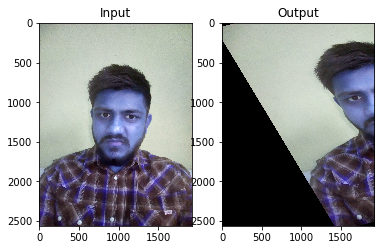

In [52]:
img = cv2.imread('1744003O_anger1.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(dst,None)
kmeans = KMeans(n_clusters=1, random_state=0).fit(des)
test1=[]
test1.append(kmeans.cluster_centers_)
print(np.array(test1).shape)
test1= np.reshape(test1,(1,128))
clf.predict(test1)